# Understanding Feature Mapping on Principal Components

Principal Component Analysis or PCA is a very effective technique to reduce dimensionality of data. Data with fewer dimensions are less prone to overfitting, increases ML algorithm speed and most importantly helps in visualizing a 2 or 3 dimensional projection of a multi-dimensional dataset. Below is an example of 2D projection of wine dataset having 13 features. From this visualization we can get a good idea of how well separated the 3 classes are. It also helps us in understanding effect of the two principal components on the output variable. But unfortunately it doesn't throw any light on how the 13 features are contributing towards the output class separation. In this notebook we will try to overcome this limitation of PCA and establish visual relation between feature space and principal components.

For detailed understanding of PCA, you can refer the following resources.

[A One-Stop Shop for Principal Component Analysis by Matt Brems](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

[Feature extraction using PCA by Vincent Spruyt](https://www.visiondummy.com/2014/05/feature-extraction-using-pca/)

![](pca1.PNG)

We have chosen the same wine dataset for this study. The description of this dataset can be seen below.

In [85]:
from sklearn import datasets
wine = datasets.load_wine()
print (wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

The dataset has 3 target classes and 13 numeric features. Let's try to visualize the distribution and pairwise relation of all features.

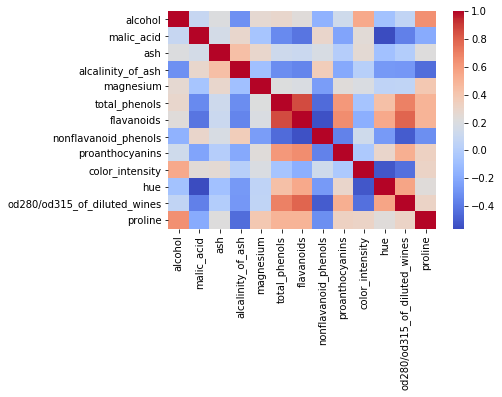

In [86]:
import pandas as pd
import seaborn as sns
features = wine.feature_names
feature_count = len(wine.feature_names)
y = wine.target
wine_df = pd.DataFrame(wine.data, columns=features)
sns.heatmap(wine_df.corr(),cmap='coolwarm')

From the plot we can see that features viz. 'total_phenols' and 'flavanoids' are positively correlated, whereas 'malic_acid' and 'hue' are negatively correlated. Also there are certain feature pairs viz. 'ash' and 'proanthocyanins' which are not correlated. Let's take these 6 features and visualize their distribution and pairwise relation. Same observation can be validated from the correlation heatmap shown below.


C:\Users\Anirban\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


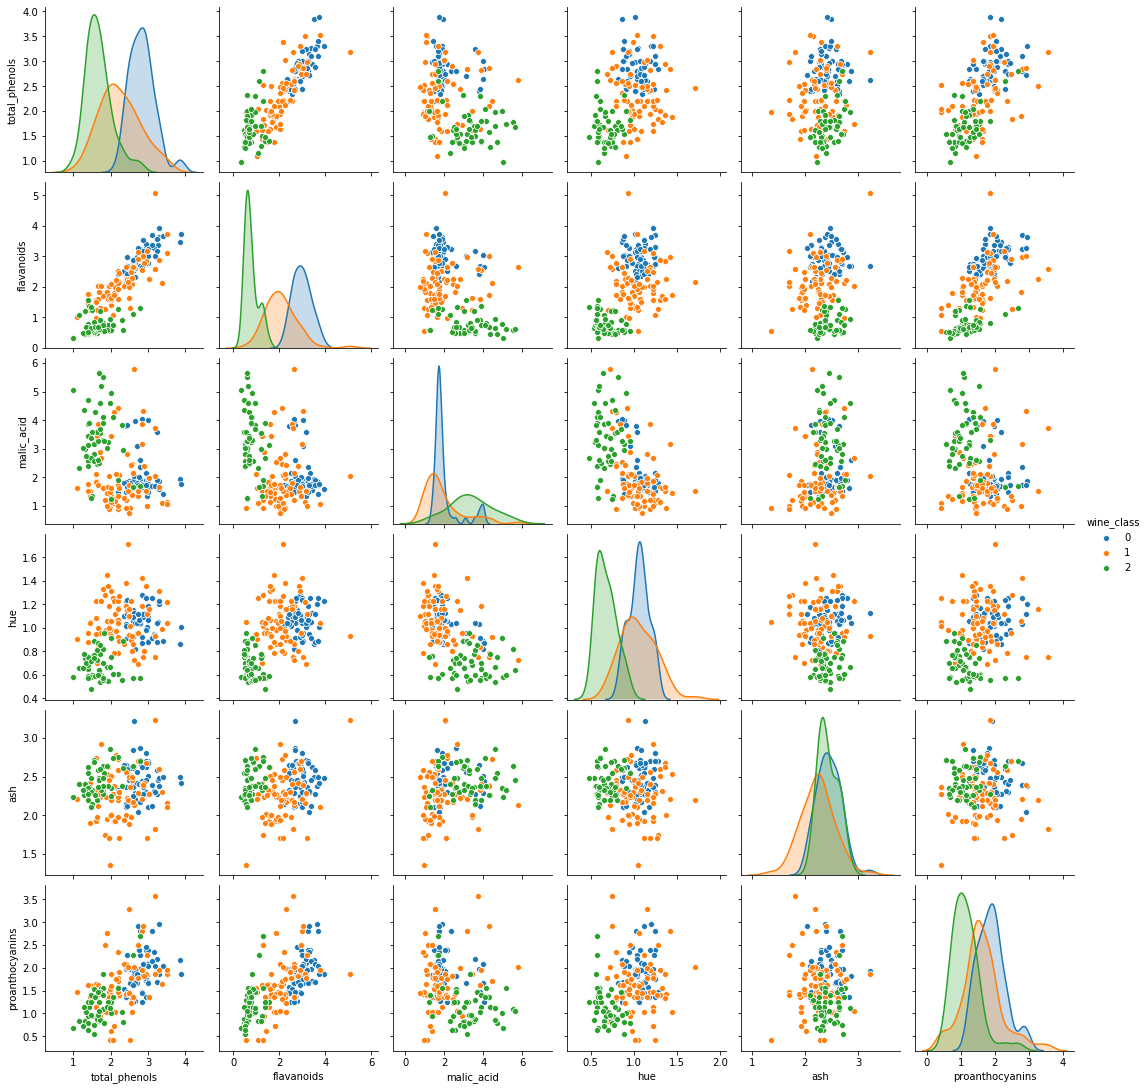

In [87]:
%matplotlib inline
feature_subset = ['total_phenols','flavanoids','malic_acid','hue','ash','proanthocyanins']
wine_df_slice = wine_df[feature_subset]
wine_df_slice['wine_class'] = y
sns.pairplot(wine_df_slice,hue='wine_class')

Now before we start building our wine classification model, it would be good to have a visual, which represents the effect of input features on output classes. But as mentioned earlier, it's difficult to represent all 13 features along with the output classes in a single plot.

One approach is to construct multiple pairwise plots each depicting the relation between one input feature and the output classes as shown below.

C:\Users\Anirban\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


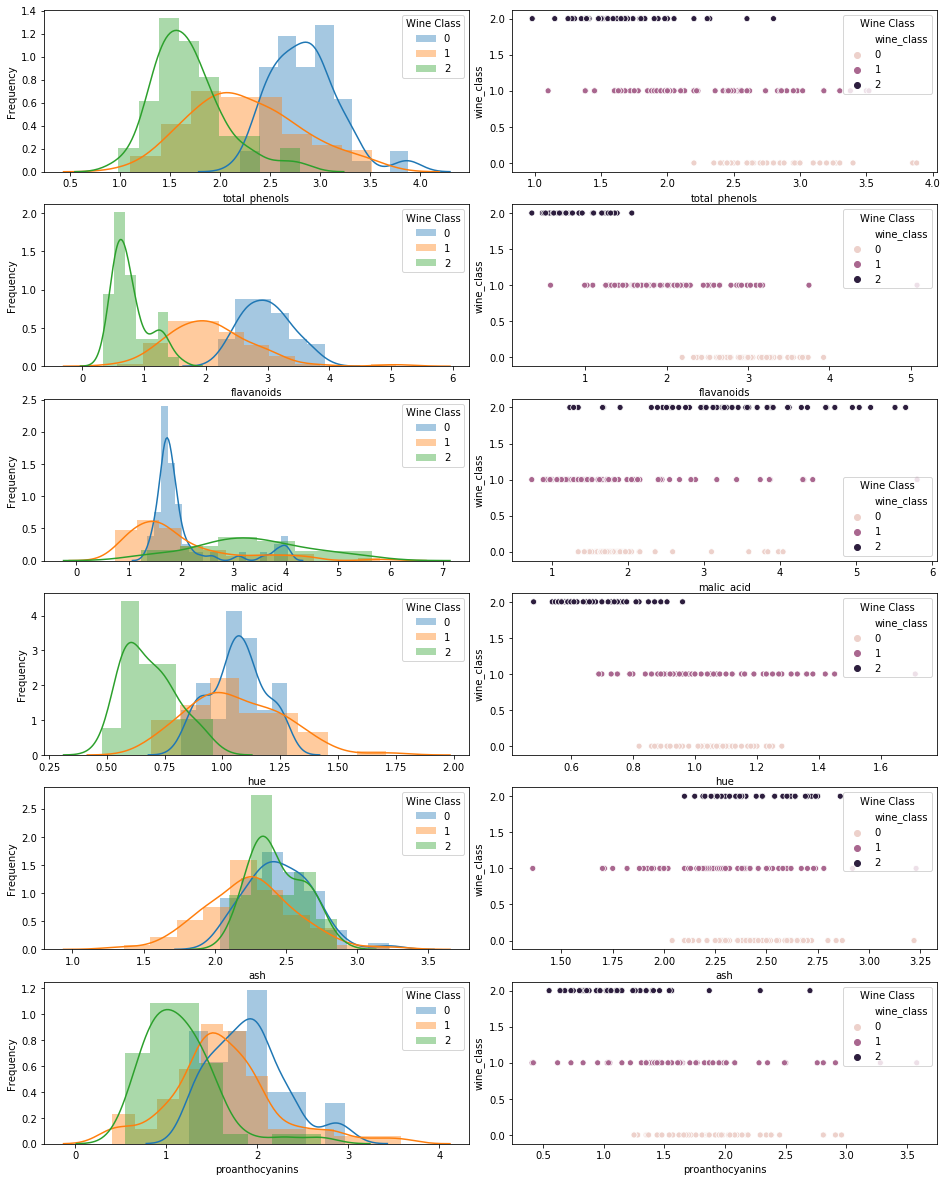

In [88]:
wine_df_slice['wine_class'] = y
fig = plt.figure(figsize = (16, 18))
fig.subplots_adjust(top=1, wspace=0.1)

for i in range(len(feature_subset)):
    ax = fig.add_subplot(len(feature_subset),2, 2*i+1)
    ax.set_ylabel("Frequency") 

    _, bins = np.histogram(wine_df_slice[feature_subset[i]])
    g = sns.FacetGrid(wine_df_slice, hue="wine_class")
    g.map(sns.distplot, feature_subset[i], ax=ax)
    ax.legend(title='Wine Class')
    plt.close(2)
    
    ax = fig.add_subplot(len(feature_subset),2, 2*i+2)
    ax = sns.scatterplot(x=feature_subset[i], y="wine_class", hue="wine_class",
                     data=wine_df_slice)
    ax.legend(title='Wine Class')
    plt.close(2)

C:\Users\Anirban\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


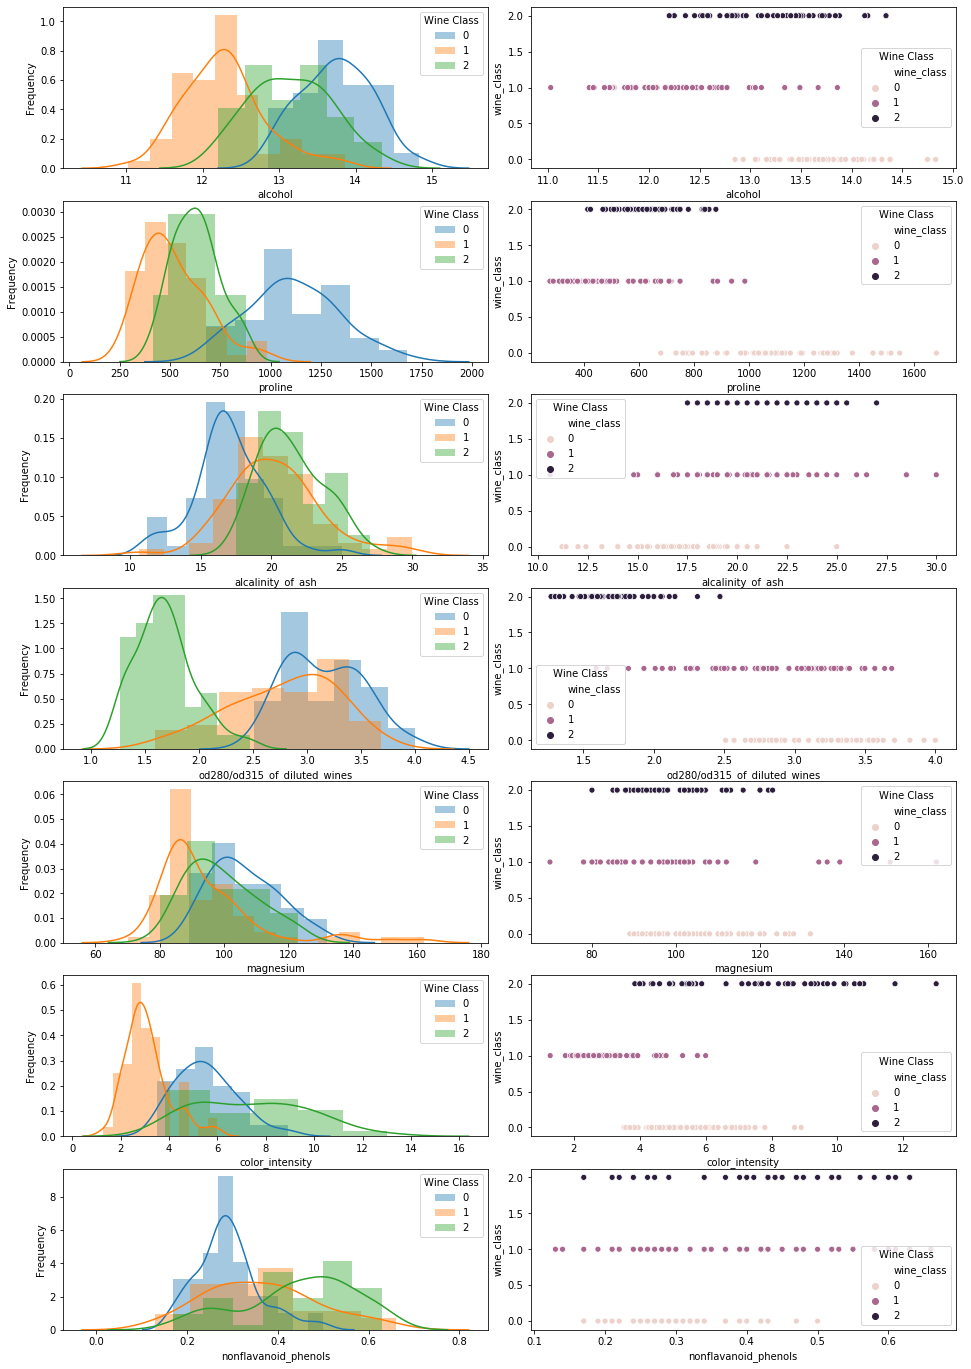

In [89]:
rem_features = list(set(features) - set(feature_subset))
wine_df_slice = wine_df[rem_features]
wine_df_slice['wine_class'] = y
fig = plt.figure(figsize = (16, 21))
fig.subplots_adjust(top=1, wspace=0.1)

for i in range(len(rem_features)):
    ax = fig.add_subplot(len(rem_features),2, 2*i+1)
    ax.set_ylabel("Frequency") 

    _, bins = np.histogram(wine_df_slice[rem_features[i]])
    g = sns.FacetGrid(wine_df_slice, hue="wine_class")
    g.map(sns.distplot, rem_features[i], ax=ax)
    ax.legend(title='Wine Class')
    plt.close(2)
    
    ax = fig.add_subplot(len(rem_features),2, 2*i+2)
    ax = sns.scatterplot(x=rem_features[i], y="wine_class", hue="wine_class",
                     data=wine_df_slice)
    ax.legend(title='Wine Class')
    plt.close(2)

The drawbacks of this approach are,
1. There are too many plots to investigate,
2. It’s difficult to explore the multivariate nature of the problem.
To address the above limitations, we will first try to visualize the dataset by projecting it to its first two principal components and then visualize the contribution of each individual feature along these two principal components.
Let’s start the exercise by first standardizing the data, so that all the feature columns have zero mean and 1 standard deviation. Standardization is required to ensure that the principal components are not getting biased towards any specific feature subset.

In [90]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler=StandardScaler()
scaler.fit(wine.data)
X_scaled=scaler.transform(wine.data)

pca = PCA(n_components=2).fit(X_scaled)
X_reduced = pca.transform(X_scaled)

Once a 2-component PCA is fitted and the standardized data is transformed using this fitted PCA model, we need to introduce feature vectors on the same PCA plane.
We can iteratively vary each individual feature keeping all other features constant and perform PCA transform for each iteration to understand the effect of that particular feature on both the principal components. First we simulate data where all the feature values are 0 and apply PCA transform on it. Now as the PCA was fitted on standardized data, feature value = 0, represents mean feature value and hence both the principal components of this simulated data will also be 0.
Now for a feature f, if we increase its value by 1 (means increase of 1 standard deviation), keeping all other feature values fixed at 0 and again apply PCA transform, we will observe that the principal component values have drifted from (0,0) position to some (f1,f2) position.

In [91]:
f = np.zeros((2,feature_count))
feature_map = []
for k in range(feature_count):
    fk = f.copy()
    fk[:,k] = [0,1]
    fk_reduced = pca.transform(fk)
    feature_map += [fk_reduced]

feature_map = np.array(feature_map)

Drawing a line from (0,0) to (f1, f2) will represent projection of feature vector f on the PCA plane for 1 standard deviation increase of that feature. In a similar fashion, feature vector projection can be plotted for all the input features. For better visualization, we can scale the projected features as shown in the following code snippet and superimpose on the actual PCA plot.

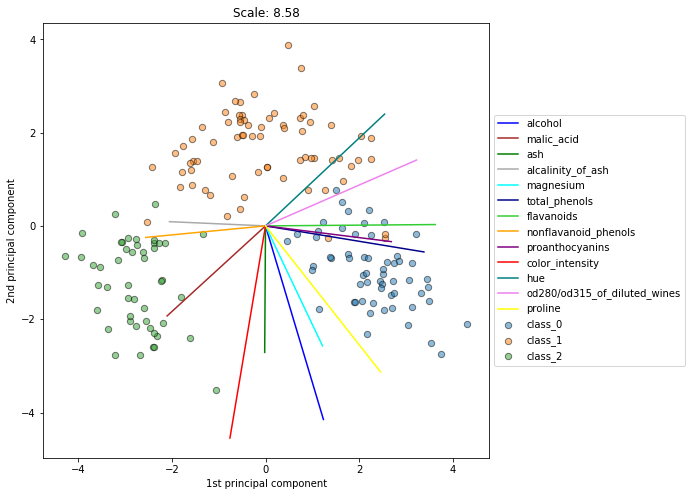

In [92]:
scale = 1/np.mean(abs(feature_map))
feature_map = feature_map*scale

colors = [ 'blue','brown', 'green', 'darkgray', 'cyan', 'darkblue', 'limegreen', 'orange', 'purple', 'red', 'teal', 'violet', 'yellow']
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
for k in range(feature_count):
    plt.plot(feature_map[k,:, 0], feature_map[k,:, 1], color = colors[k], label = features[k])
plt.title("Scale: "+str(round(scale,2)))

for t in range(len(wine.target_names)):
    plt.scatter(X_reduced[:, 0][y==t], X_reduced[:, 1][y==t],edgecolor='k', s=40, alpha=0.5, label=wine.target_names[t])
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.legend()
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

From the above plot we can clearly see how each individual feature is affecting the principal components. The length of each feature vector represents how sensitive the principal components are towards that feature and the direction of the feature vector represent which component is getting more affected (positively or negatively) by that particular feature. Also we can obseve how correlated a pair of features are. Positively correlated features are likely to be pointing towards same direction, whereas negatively correlated features are likely to be pointing towards opposite direction. In case a pair of features are not correlated, the angle between them will tend to 90 degrees. All these observations can be validated from the correlation heatmap shown earlier.

The best part is now we can easily interpret the relation between the features and output classes. For example, features like 'flavanoids', 'total_phenols' and 'proanthocyanins' positively contribute towards 'class_0' wine, whereas 'alcalinity_of_ash' and 'nonflavanoid_phenols' have negative contribution. Not only that, if we try to increase the value of 'hue' and 'alcohol' together, that can also increase the probability of wine being classified as 'class_0', whereas increasing 'hue' alone might increase the probability of 'class_1' prediction. Similar interpretation can be made for all the wine clases as well, even before building any predictive model. 

Not convinced yet?

Try out any classification model of your choice on this dataset and find yourself whether you are able to interpret your prediction with this visualization.